In [15]:
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv
# will need to run: pip install quandl
import quandl
import plotly.express as px

In [16]:
#import consumer price data from quandl API. Imports directly as a DataFrame
CPI = quandl.get("RATEINF/CPI_USA")
PPI = quandl.get("FRED/PPIACO")

In [24]:
# Convert CPI/PPI into inflation rate. Calculates the change in CPI/PPI (compared to the same month in the prior year). For example: March 2021 Inflation Rate = (March 2021 CPI - March 2020 CPI)/March 2020 CPI
inflation_rate_cpi = (CPI - CPI.shift(12))/CPI.shift(12)
inflation_rate_ppi = (PPI - PPI.shift(12))/PPI.shift(12)

In [25]:
# Drop Nulls and set column headers
inflation_rate_cpi = inflation_rate_cpi.dropna()
inflation_rate_cpi.columns = ['Inflation Rate CPI']
inflation_rate_ppi = inflation_rate_ppi.dropna()
inflation_rate_ppi.columns = ['Inflation Rate PPI']

In [27]:
plot_CPI = px.line(inflation_rate_cpi, title="Inflation Rate CPI")
plot_PPI = px.line(inflation_rate_ppi, title="Inflation Rate PPI")

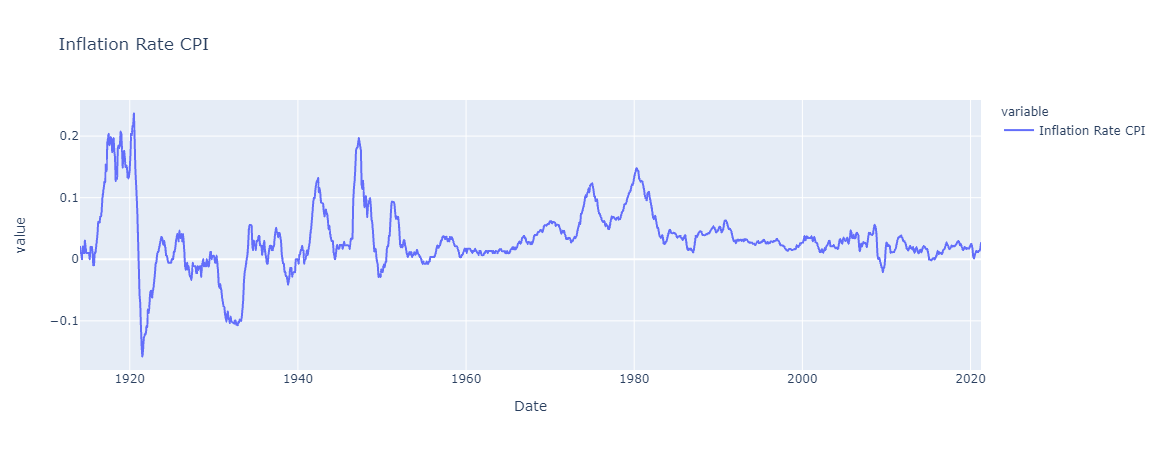

In [28]:
plot_CPI

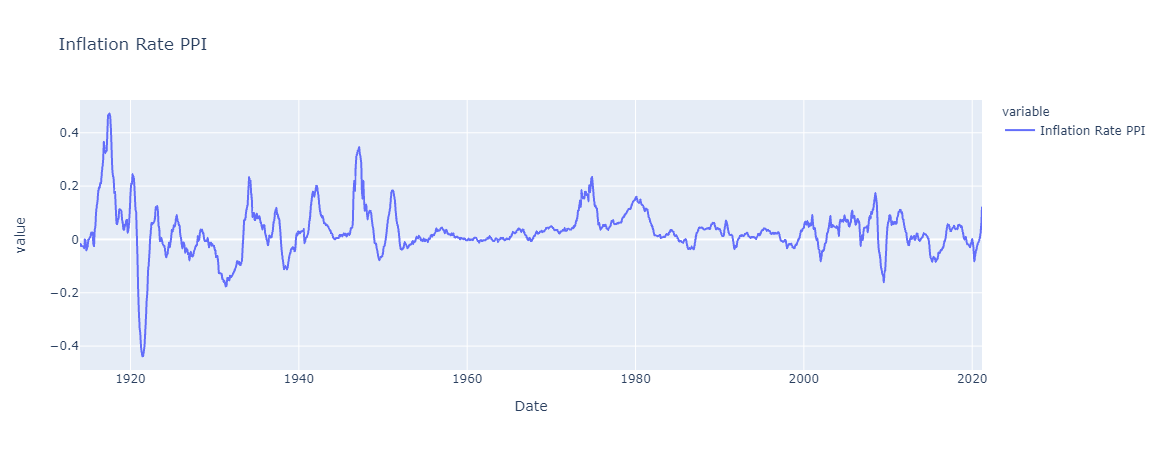

In [29]:
plot_PPI